The goal here is to check the S/N for different photo-z bins; addresses [#16](https://github.com/LSSTDESC/HyperSupremeStructure-HSC-LSS/issues/16 )

The analysis is done by `get_sn_photoz_bins.py`. For convenience, we have `bash_get_sn.sh` that runs `get_sn_photoz_bins.py` for different for three different WIDE fields (`aegies`, and the two wider WIDE fields, `vvds` and `xmmlss`) for two photo-z algorithm outputs (ephor_ab, `francken_z`); dn/dz is calculated using the `z_mc` histogram (as pdf stacking takes a long time for the wider fields). Also, we compare the results from using `z_best` vs. `z_mode` as the redshift estimator. Finally, just for the smaller WIDE field, we have the results from using pdf stacking, just a comparison.

All the plots are in `/global/cscratch1/sd/awan/lsst_output/hsc_output/`, alongside the sbatch output files.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import pylab
from astropy.io import fits
from astropy.table import Table
from IPython.display import Image, display

In [8]:
fontsize = 16
pylab.rcParams['figure.figsize'] = (10, 6)
pylab.rcParams['axes.labelsize'] = fontsize
pylab.rcParams['xtick.labelsize'] = fontsize-2
pylab.rcParams['ytick.labelsize'] = fontsize-2
pylab.rcParams['legend.fontsize'] = fontsize

In [9]:
outDir = '/global/cscratch1/sd/awan/lsst_output/hsc_output/'
allpngs = [f for f in os.listdir(outDir) if f.endswith('png')]

### First compare results from pdf stacking vs. z_mc histogram

### N(z) distribution from pdf stacking vs. z_mc histogram for all three fields

wide-aegis_ephor-ab_zbest-based_nz.png


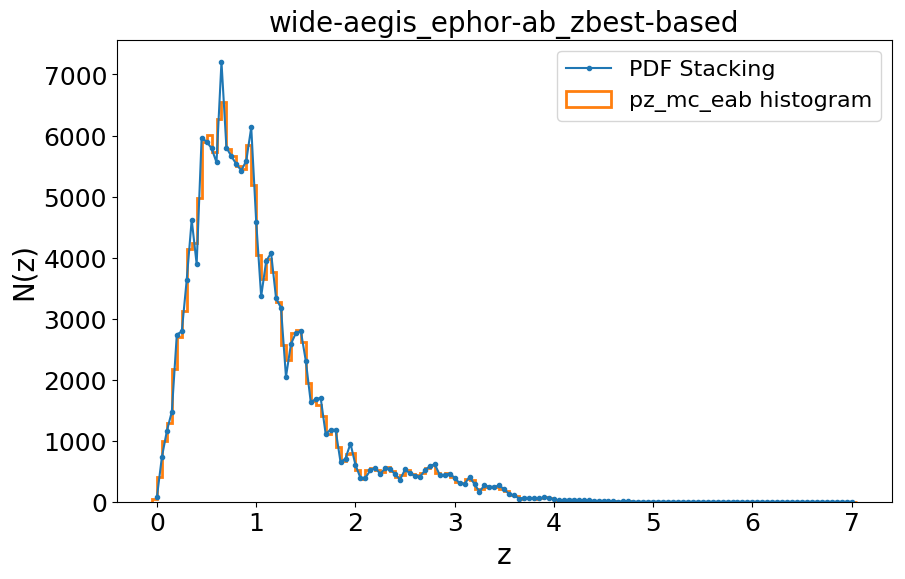

wide-xmmlss_ephor-ab_zbest-based_nz.png


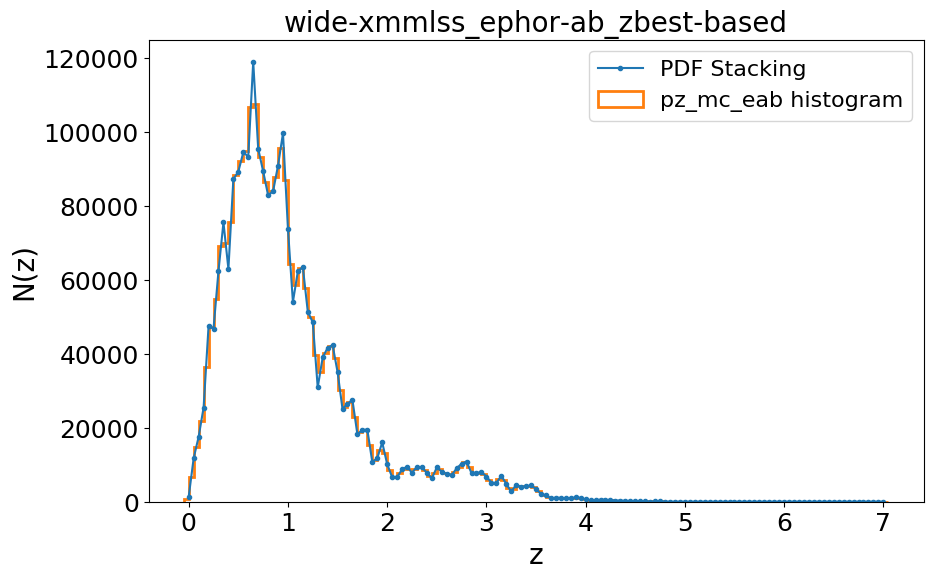

wide-vvds_ephor-ab_zbest-based_nz.png


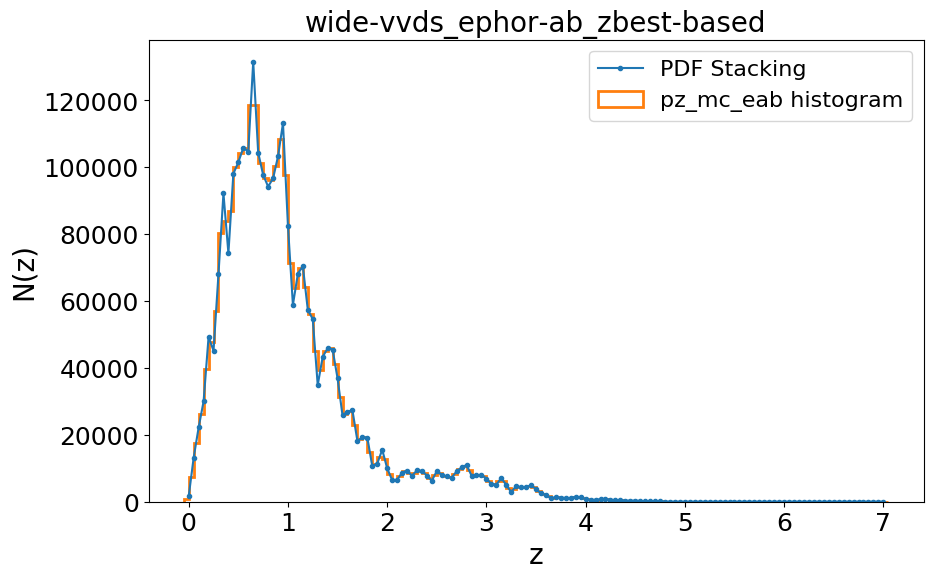

wide-xmmlss_frankenz_zbest-based_nz.png


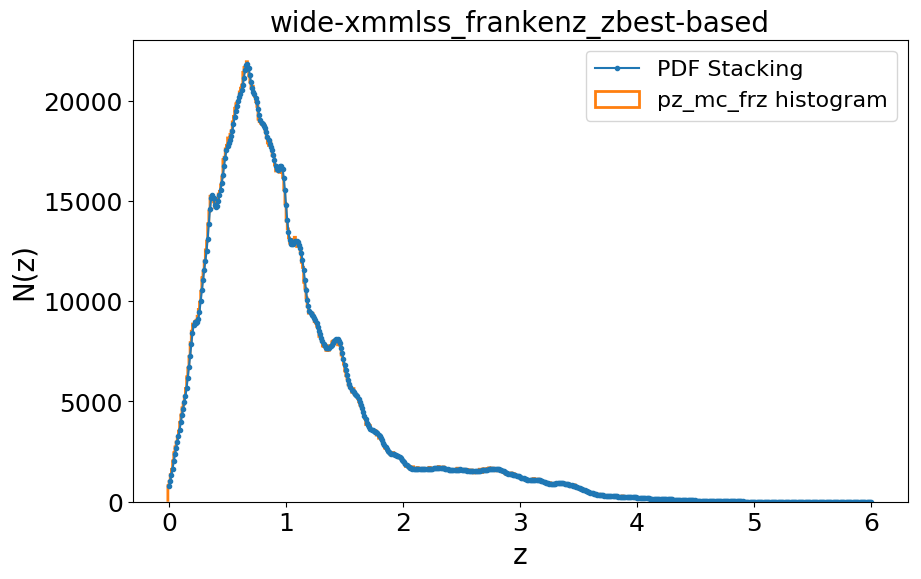

wide-vvds_frankenz_zbest-based_nz.png


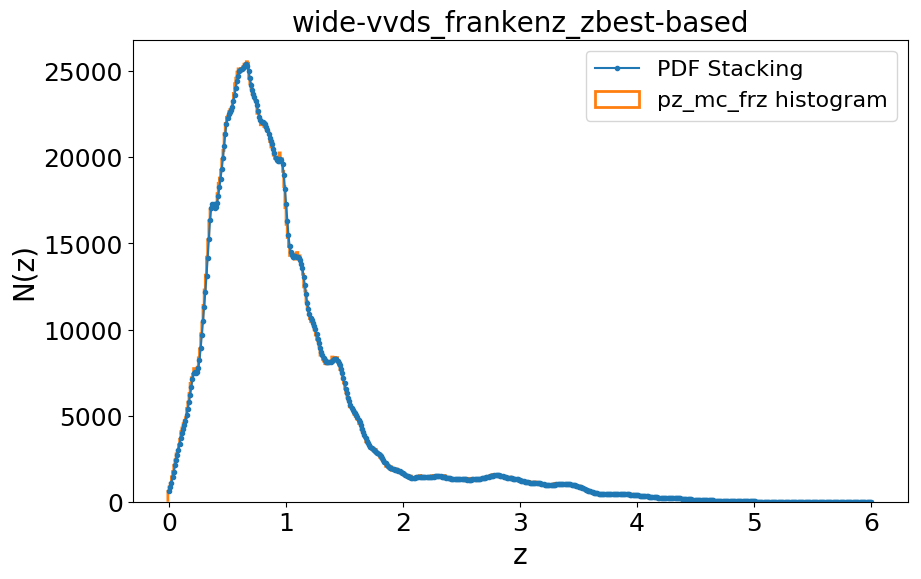

wide-aegis_frankenz_zbest-based_nz.png


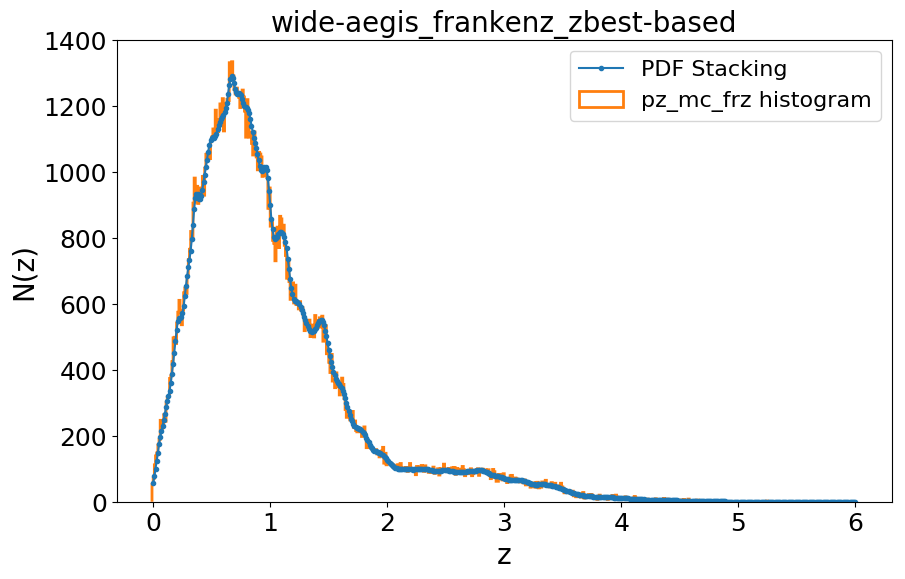

In [10]:
for alg in ['ephor-ab', 'frankenz']:
    for png in [f for f in allpngs if f.__contains__('nz.png') and f.__contains__('zbest') and f.__contains__(alg)]:
        print(png)
        display(Image(filename='%s/%s'%(outDir, png), width=500) )

Okay things look good:
- z_mc histogram ~traces the pdf stack. 
- N(z) for different fields but using the same PZ-algorithm is similar.
- N(z) for a field using ephor_ab vs. frankenz is qualitatively similar.

### S/N for WIDE_AEGIS with pdf stacking vs. z_mc histogram with z_best

wide-aegis_zbest-based_nz-from-zmcs_SN_10bins.png


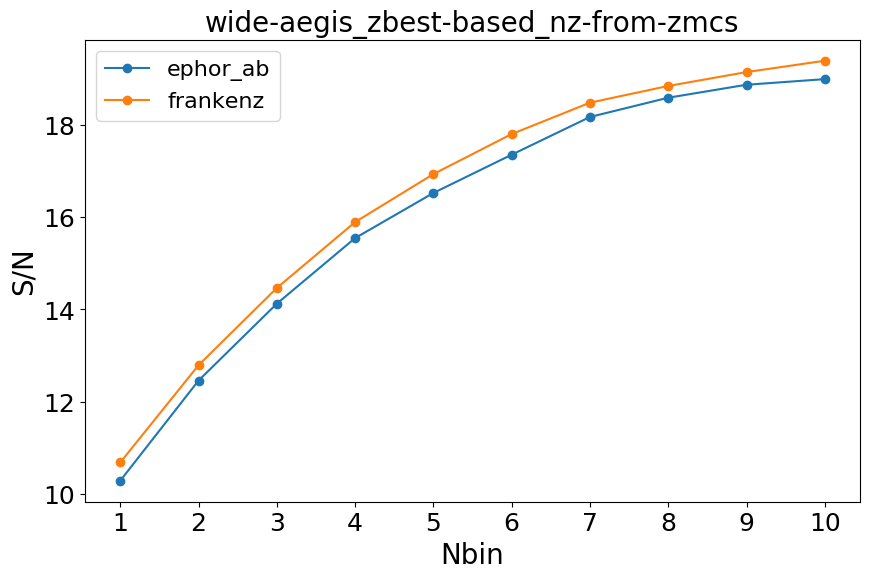

wide-aegis_zbest-based_nz-from-pdfs_SN_10bins.png


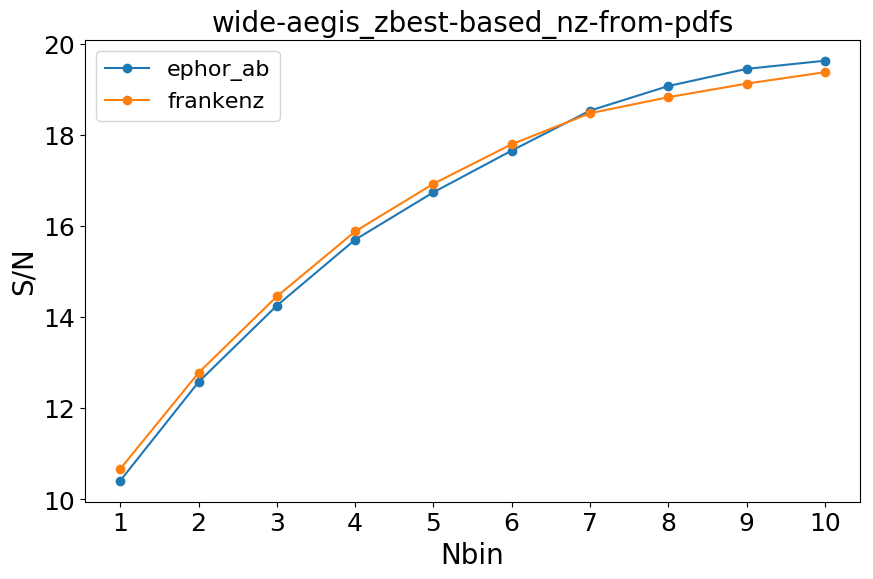

In [11]:
for png in [f for f in allpngs if f.__contains__('SN') and f.__contains__('zbest') and f.__contains__('aegis') ]:
    print(png)
    display(Image(filename='%s/%s'%(outDir, png), width=500) )

The trends in S/N estimates from pdf stacking vs. z_mc histogram are similar. When when using the z_mc histogram, S/N seems be a little smaller than when using the pdfs for dn/dz, and frankenz does a little worse than ephor_ab for Nbin>7.

### S/N for all wide fields, using z_mode vs. z_best

wide-aegis_zbest-based_nz-from-zmcs_SN_10bins.png


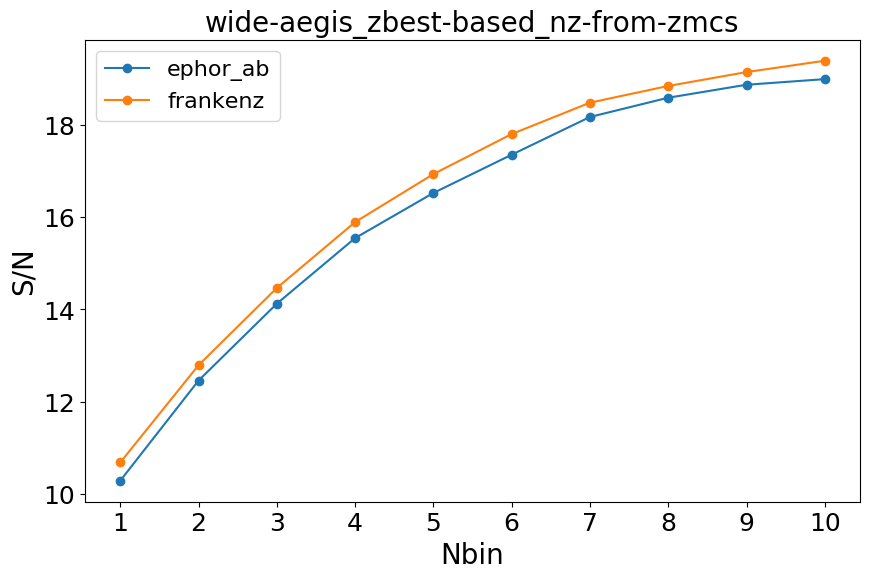

wide-aegis_zmode-based_nz-from-zmcs_SN_10bins.png


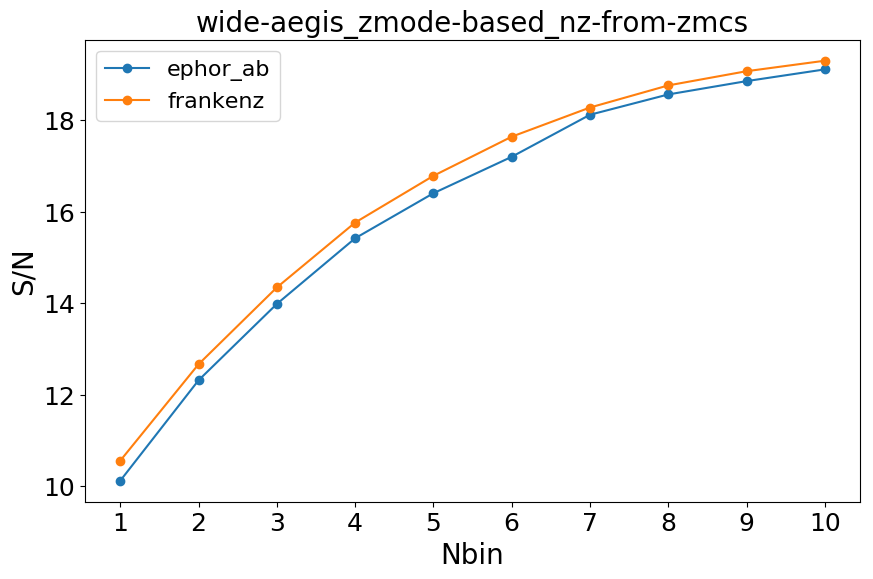

wide-vvds_zbest-based_nz-from-zmcs_SN_10bins.png


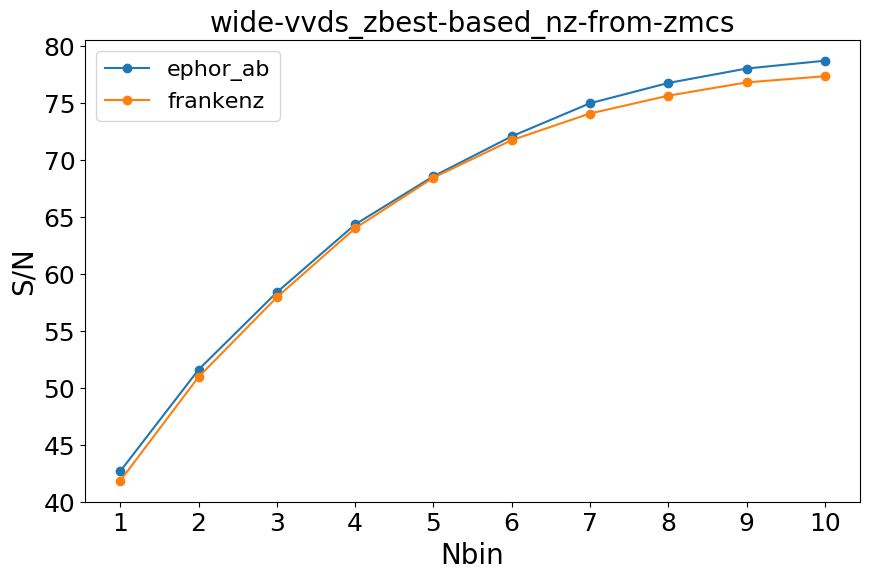

wide-vvds_zmode-based_nz-from-zmcs_SN_10bins.png


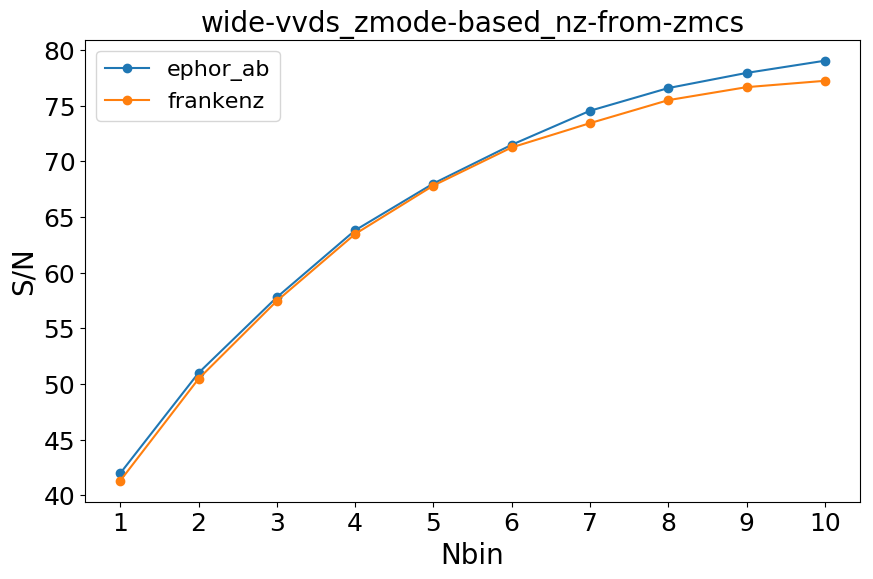

wide-xmmlss_zbest-based_nz-from-zmcs_SN_10bins.png


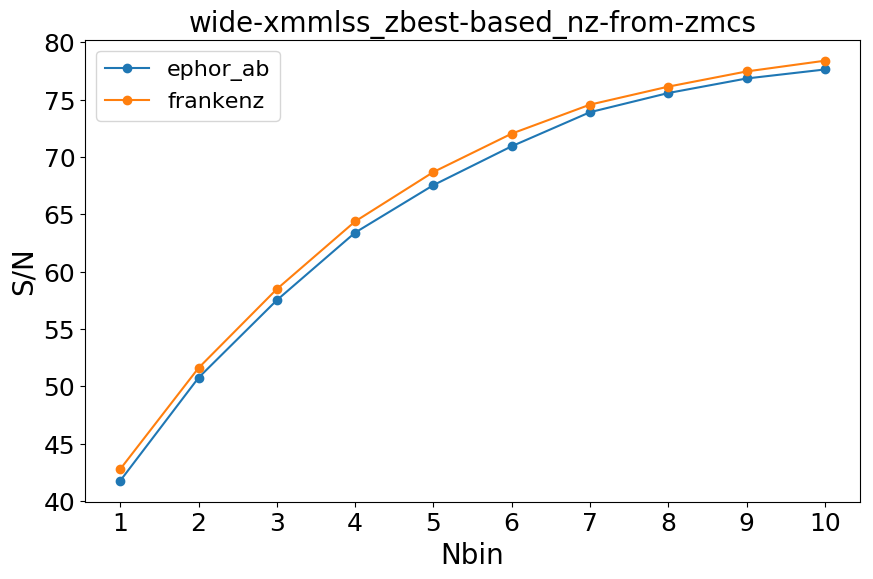

wide-xmmlss_zmode-based_nz-from-zmcs_SN_10bins.png


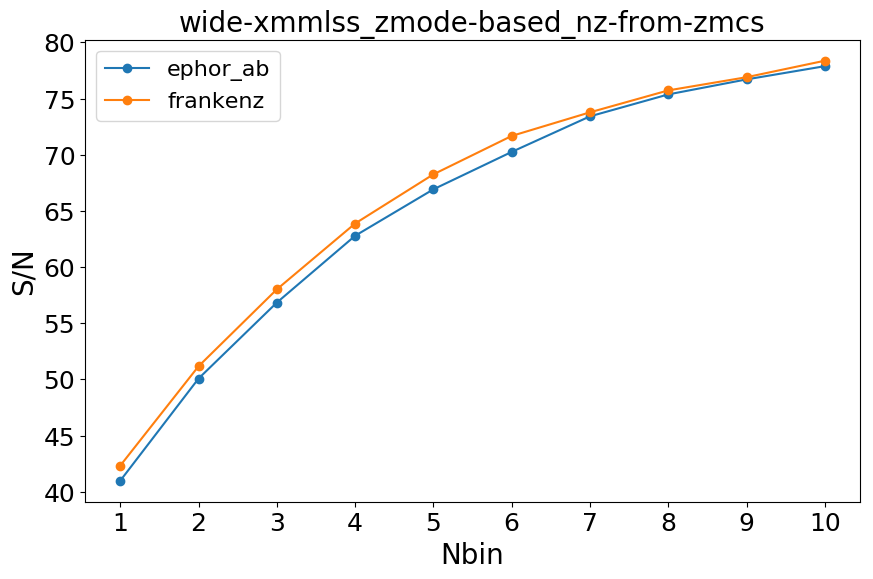

In [12]:
for field in ['aegis', 'vvds', 'xmmlss']:
    for z in ['best', 'mode']:
        for png in [f for f in allpngs if f.__contains__('SN') and f.__contains__(z) \
                    and f.__contains__(field) and f.__contains__('nz-from-zmcs') ]:
            print(png)
            display(Image(filename='%s/%s'%(outDir, png), width=500) )

Okay, here too, results are rather similar from z_best vs. z_best. Only for vvds, the SN from the two algorithms trace each other, until Nbin= 6; for the other two, franken_z gives a little higher SN than ephor_ab.

### Some miscallenous plots for the two larger fields, using z_best as the point estimator.

#### dn/dz when have 4 bins

wide-xmmlss_frankenz_zbest-based_nz-from-zmcs_dndz_4bins.png


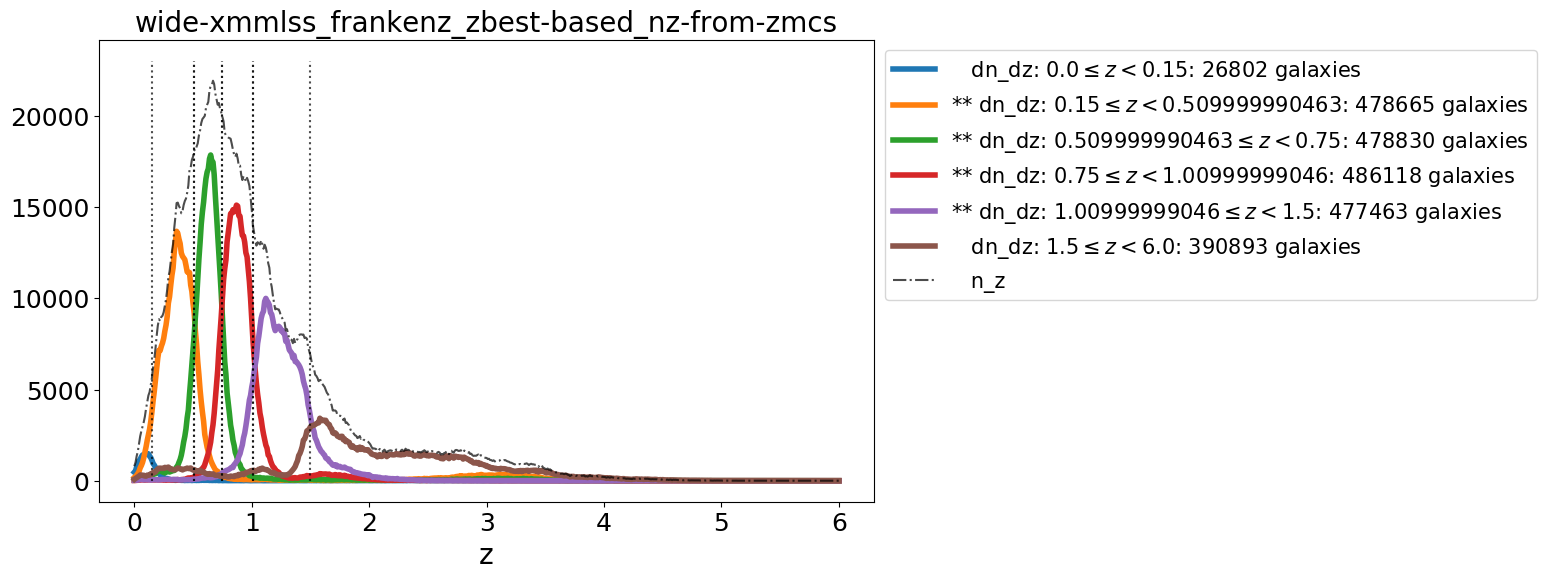

wide-vvds_ephor-ab_zbest-based_nz-from-zmcs_dndz_4bins.png


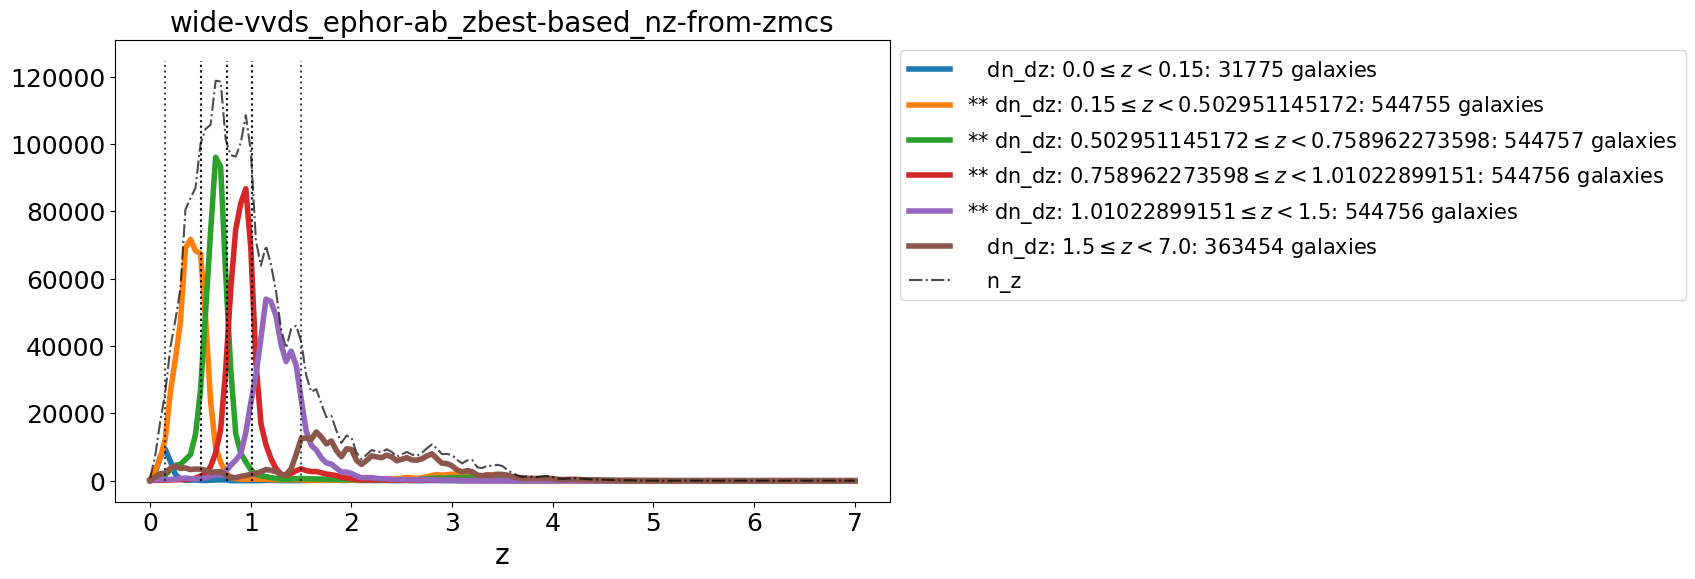

wide-vvds_frankenz_zbest-based_nz-from-zmcs_dndz_4bins.png


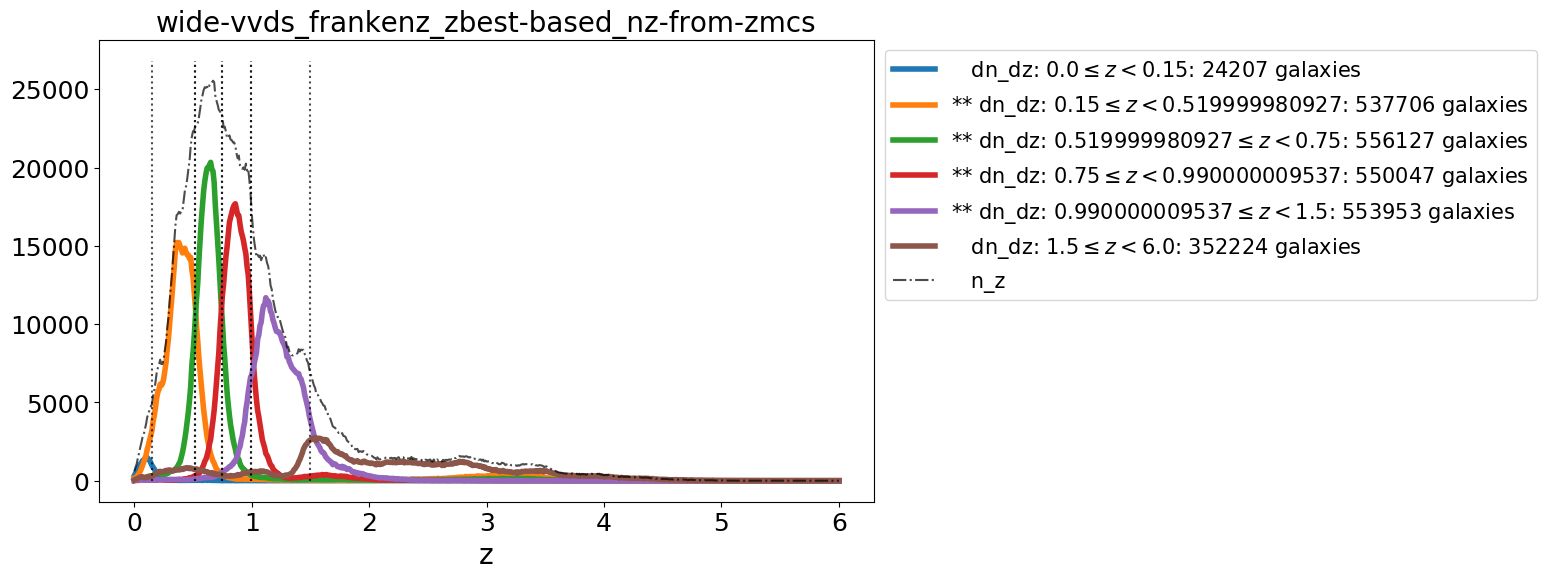

wide-xmmlss_ephor-ab_zbest-based_nz-from-zmcs_dndz_4bins.png


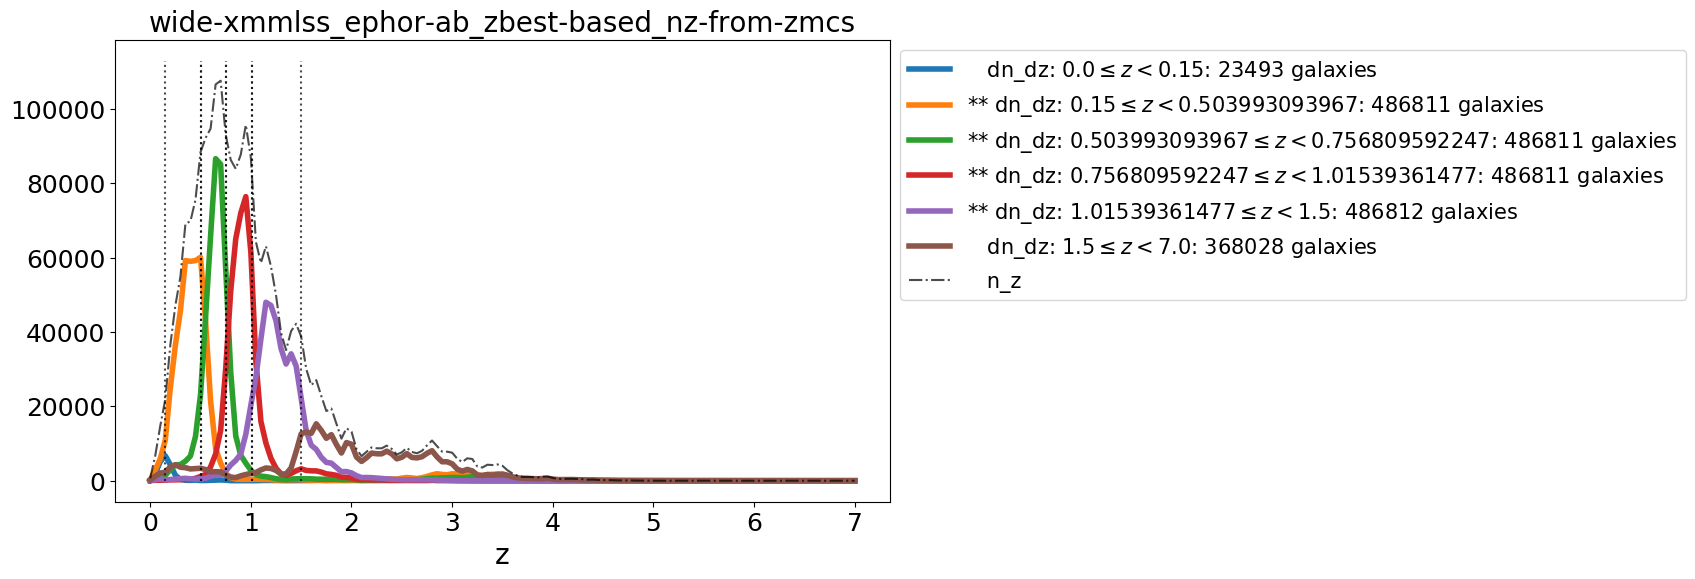

In [13]:
for png in [f for f in allpngs if f.__contains__('dndz_4bins') and f.__contains__('zbest') \
            and not f.__contains__('spec') and not f.__contains__('aegis')]:
    print(png)
    display(Image(filename='%s/%s'%(outDir, png), width=1000) )

#### dn/dz when have 5 bins

wide-vvds_frankenz_zbest-based_nz-from-zmcs_dndz_5bins.png


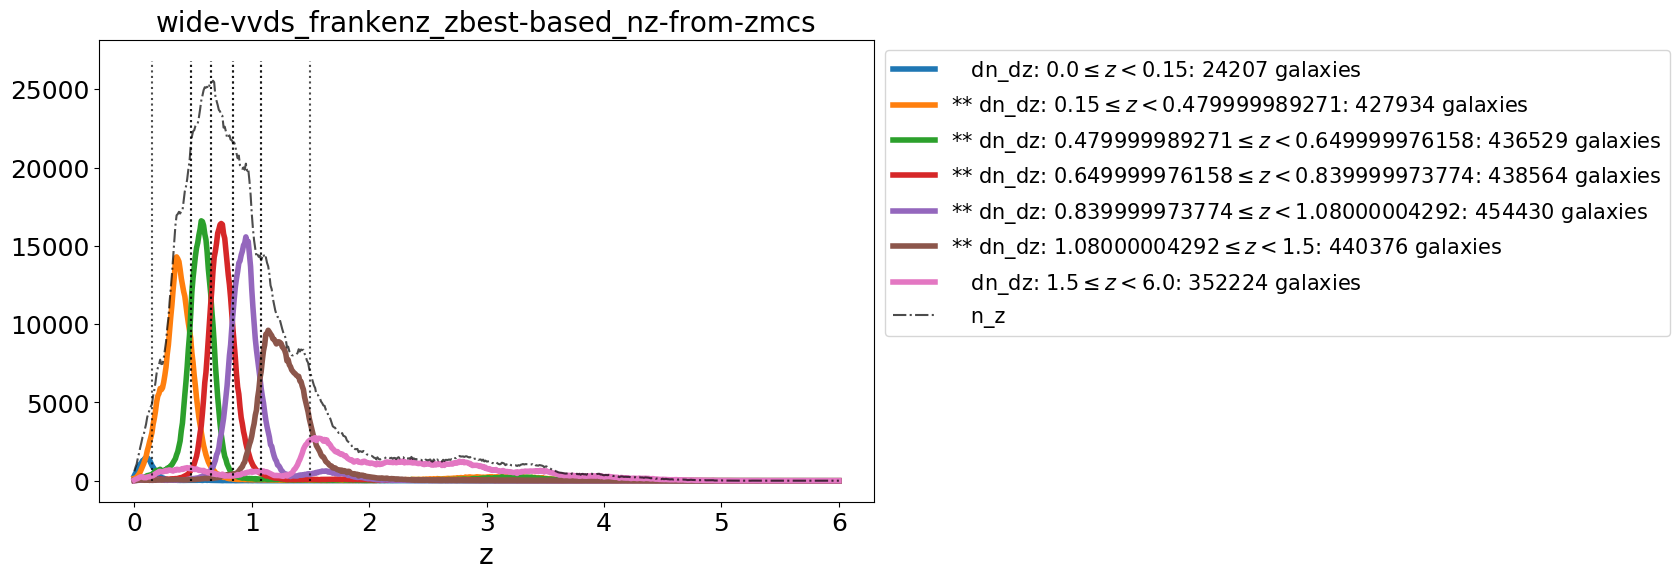

wide-xmmlss_ephor-ab_zbest-based_nz-from-zmcs_dndz_5bins.png


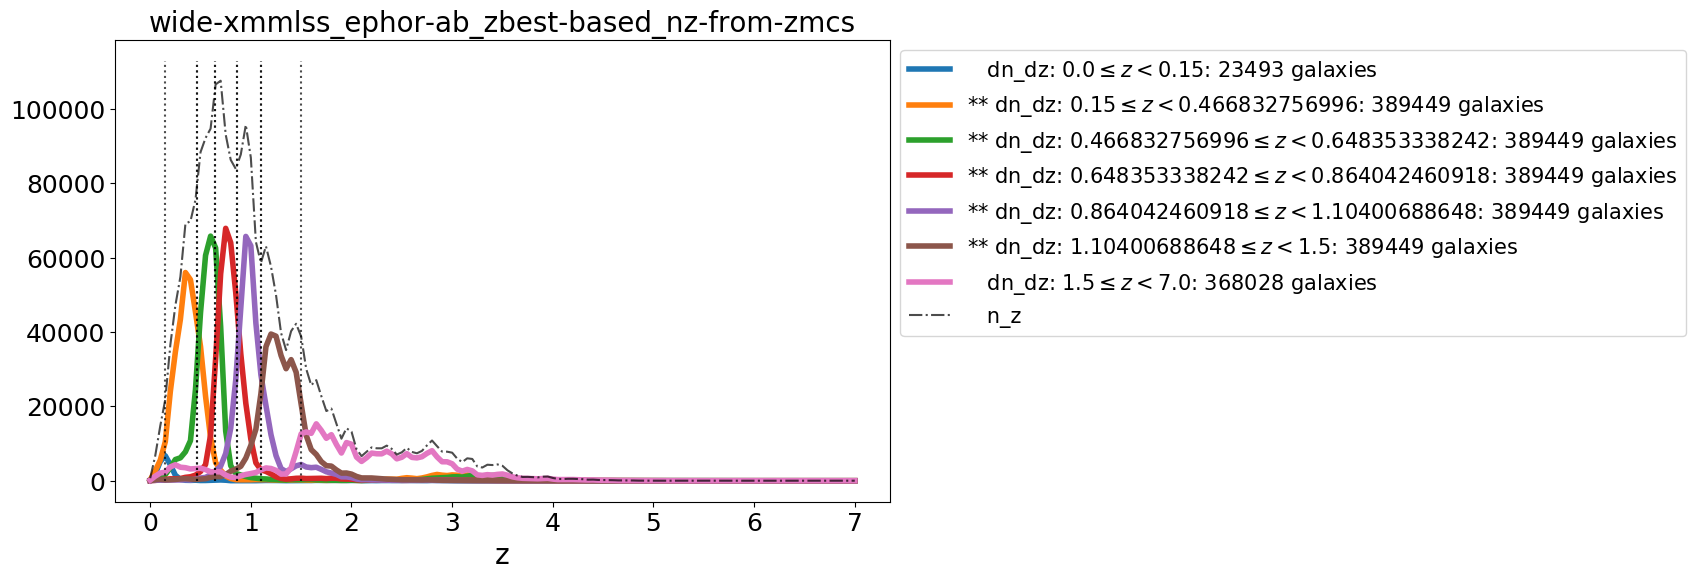

wide-vvds_ephor-ab_zbest-based_nz-from-zmcs_dndz_5bins.png


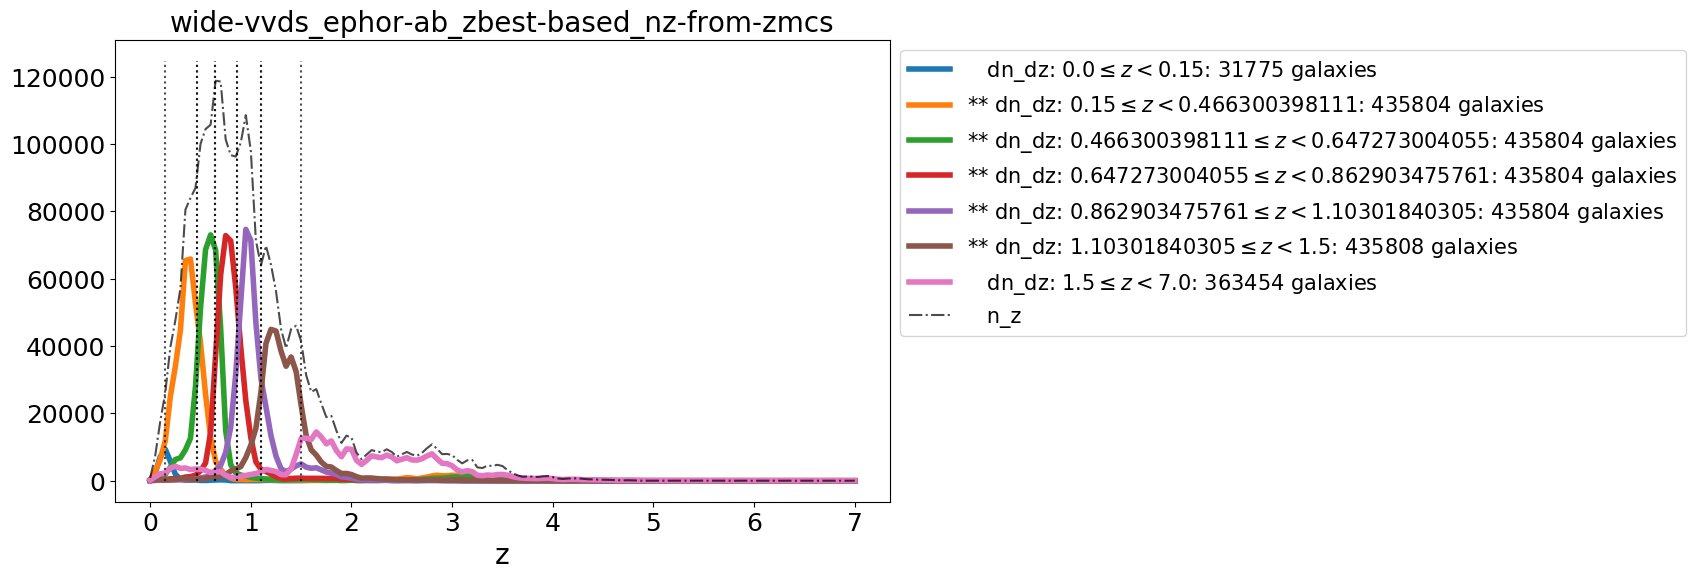

wide-xmmlss_frankenz_zbest-based_nz-from-zmcs_dndz_5bins.png


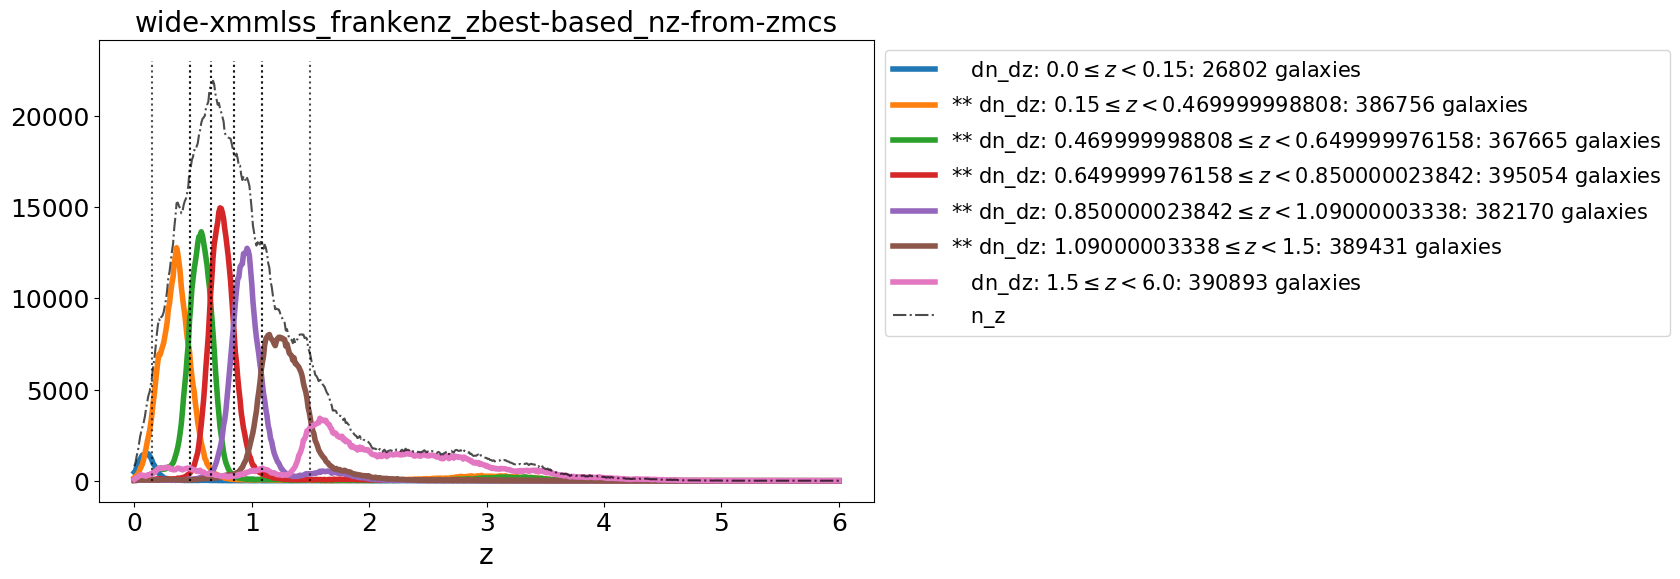

In [14]:
for png in [f for f in allpngs if f.__contains__('dndz_5bins') and f.__contains__('zbest') \
            and not f.__contains__('spec') and not f.__contains__('aegis')]:
    print(png)
    display(Image(filename='%s/%s'%(outDir, png), width=1000) )

#### dn/dz when have 10 bins

wide-xmmlss_ephor-ab_zbest-based_nz-from-zmcs_dndz_10bins.png


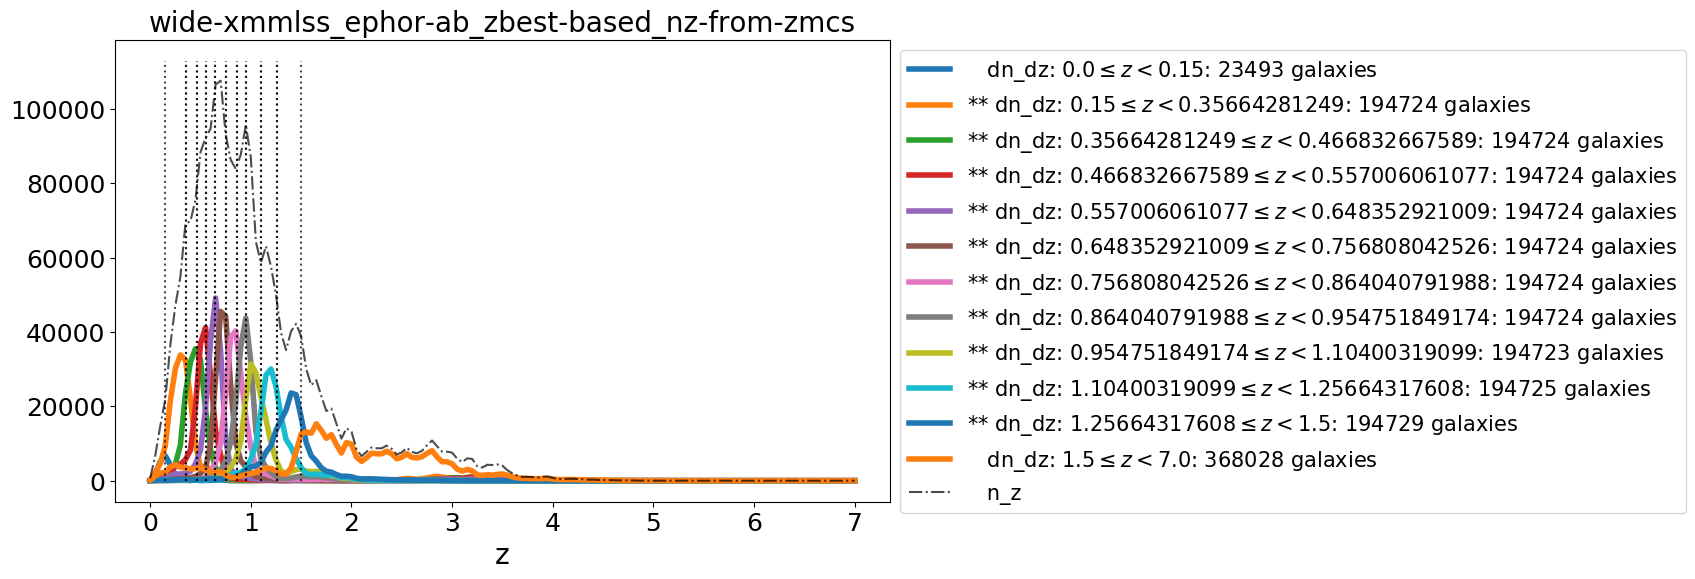

wide-xmmlss_frankenz_zbest-based_nz-from-zmcs_dndz_10bins.png


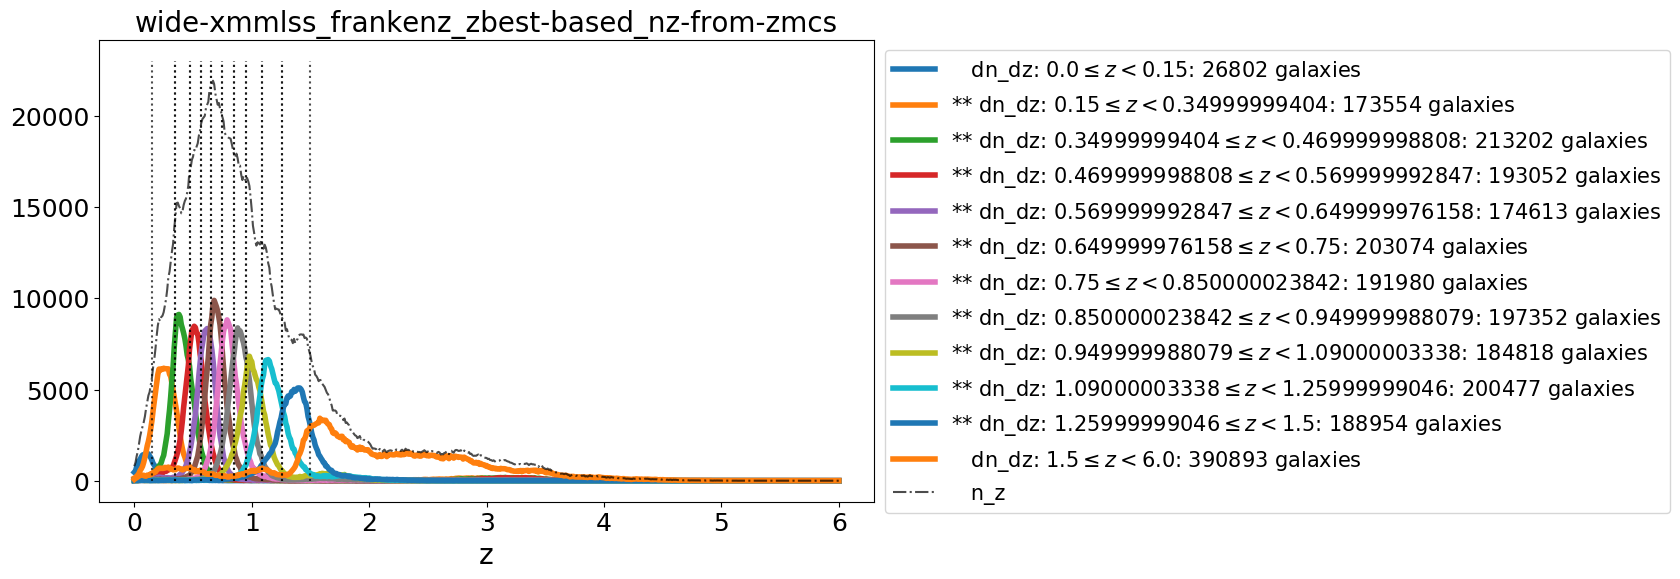

wide-vvds_ephor-ab_zbest-based_nz-from-zmcs_dndz_10bins.png


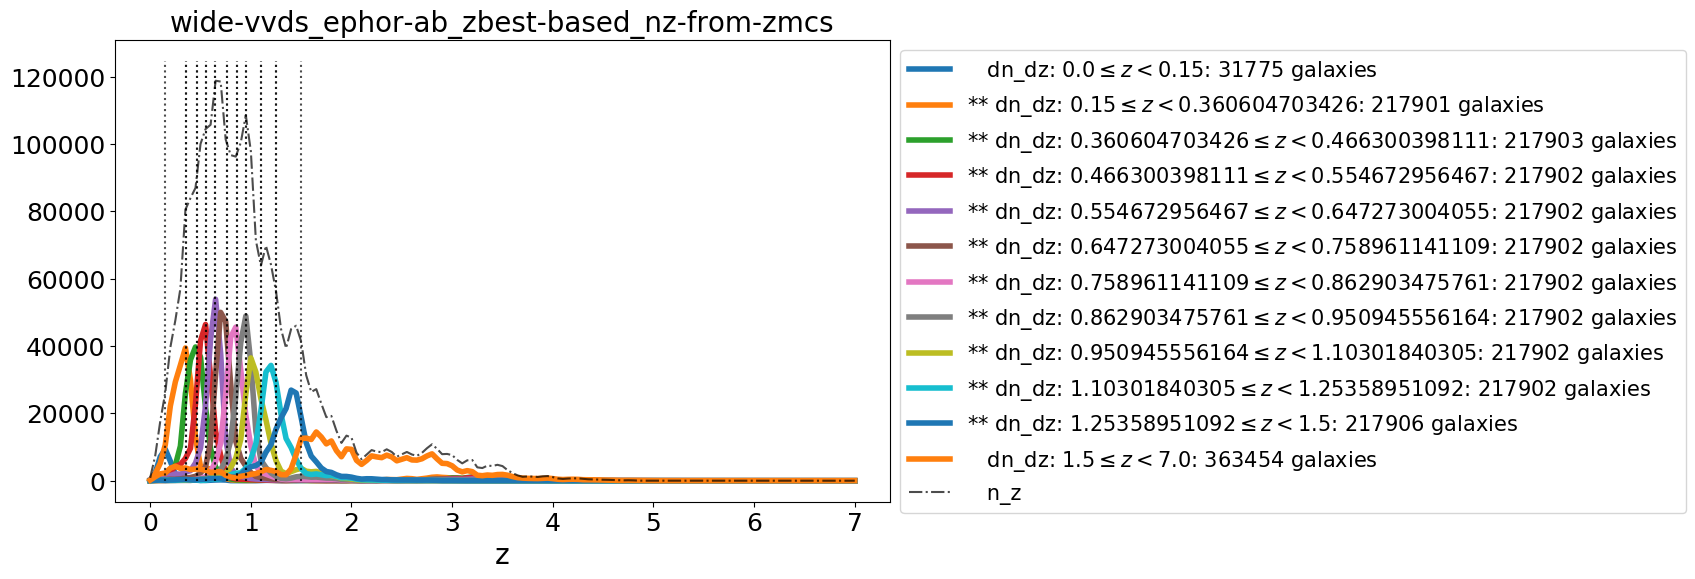

wide-vvds_frankenz_zbest-based_nz-from-zmcs_dndz_10bins.png


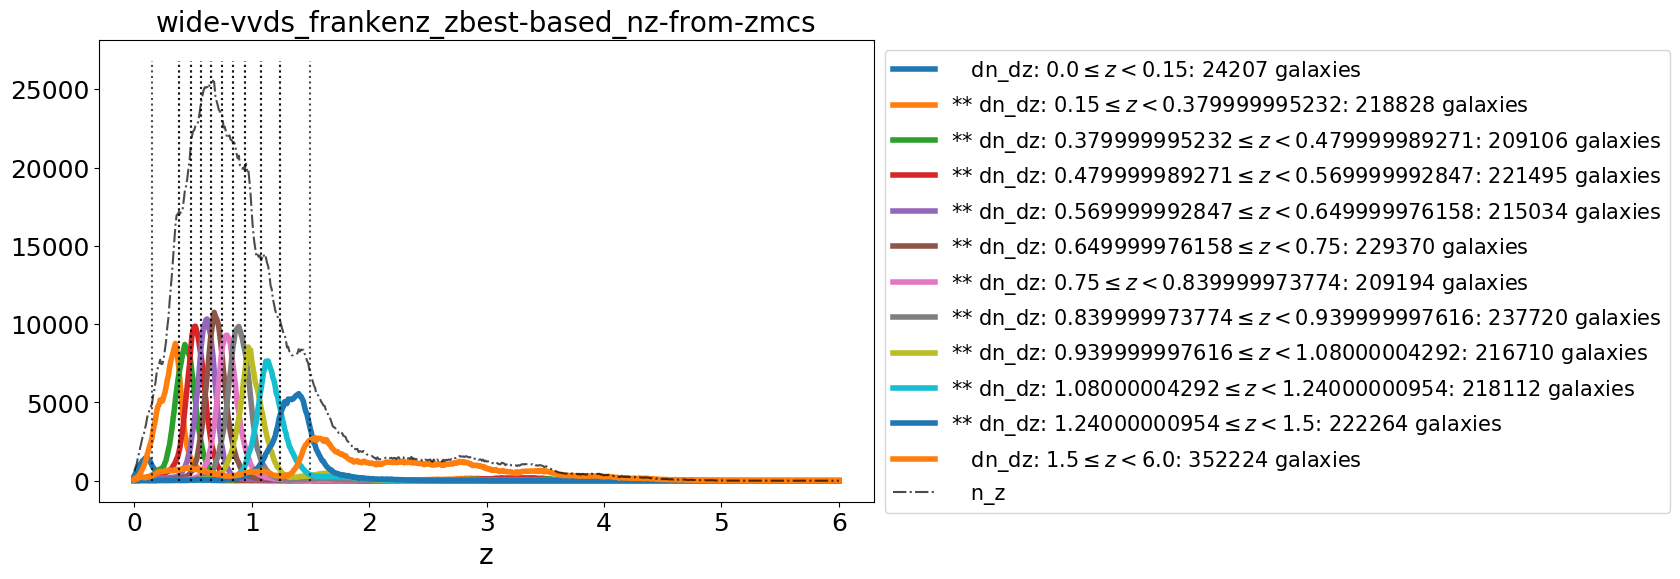

In [15]:
for png in [f for f in allpngs if f.__contains__('dndz_10bins') and f.__contains__('zbest') \
            and not f.__contains__('spec') and not f.__contains__('aegis')]:
    print(png)
    display(Image(filename='%s/%s'%(outDir, png), width=1000) )

We have the same number of galaxies in each bin when using ephor_ab, while the numbers from franken-z vary quite a bin (probably has something to do with the binning).

#### Auto and cross power spectra when have 4 bins

wide-vvds_ephor-ab_zbest-based_nz-from-zmcs_4bins_spectra.png


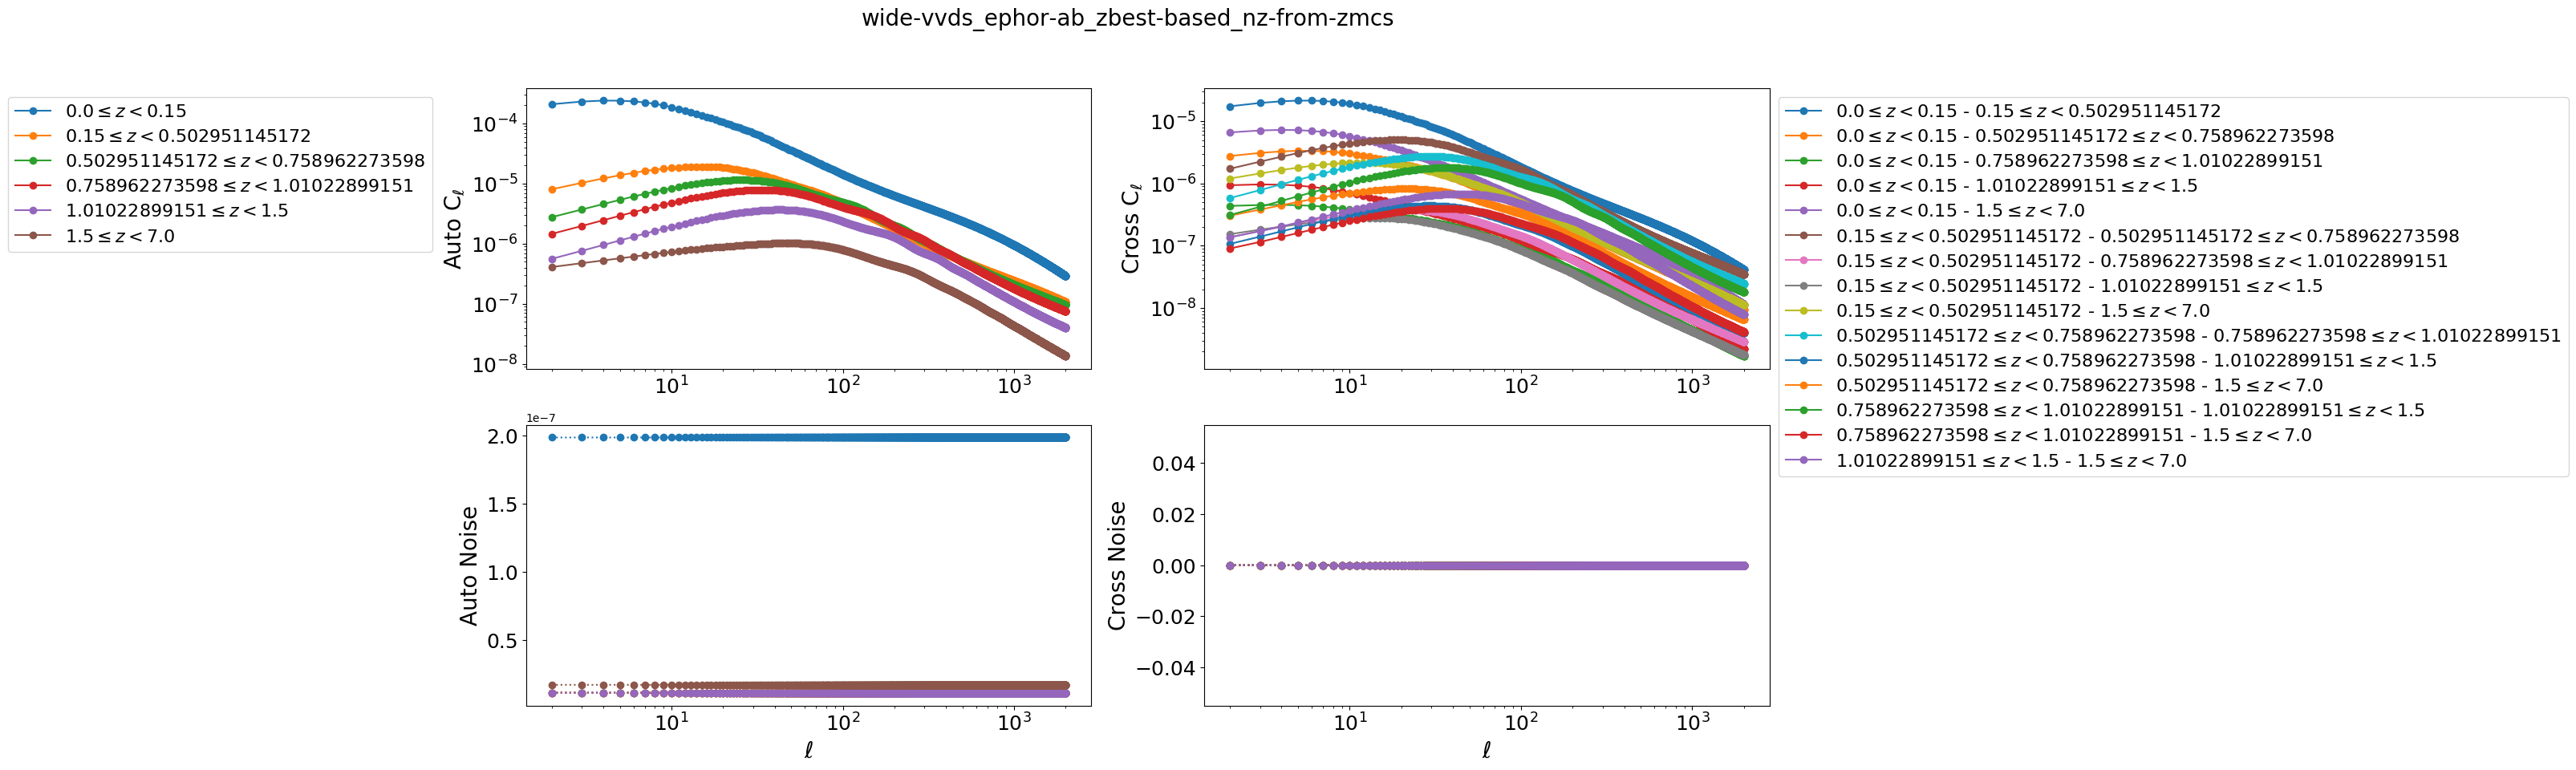

wide-xmmlss_ephor-ab_zbest-based_nz-from-zmcs_4bins_spectra.png


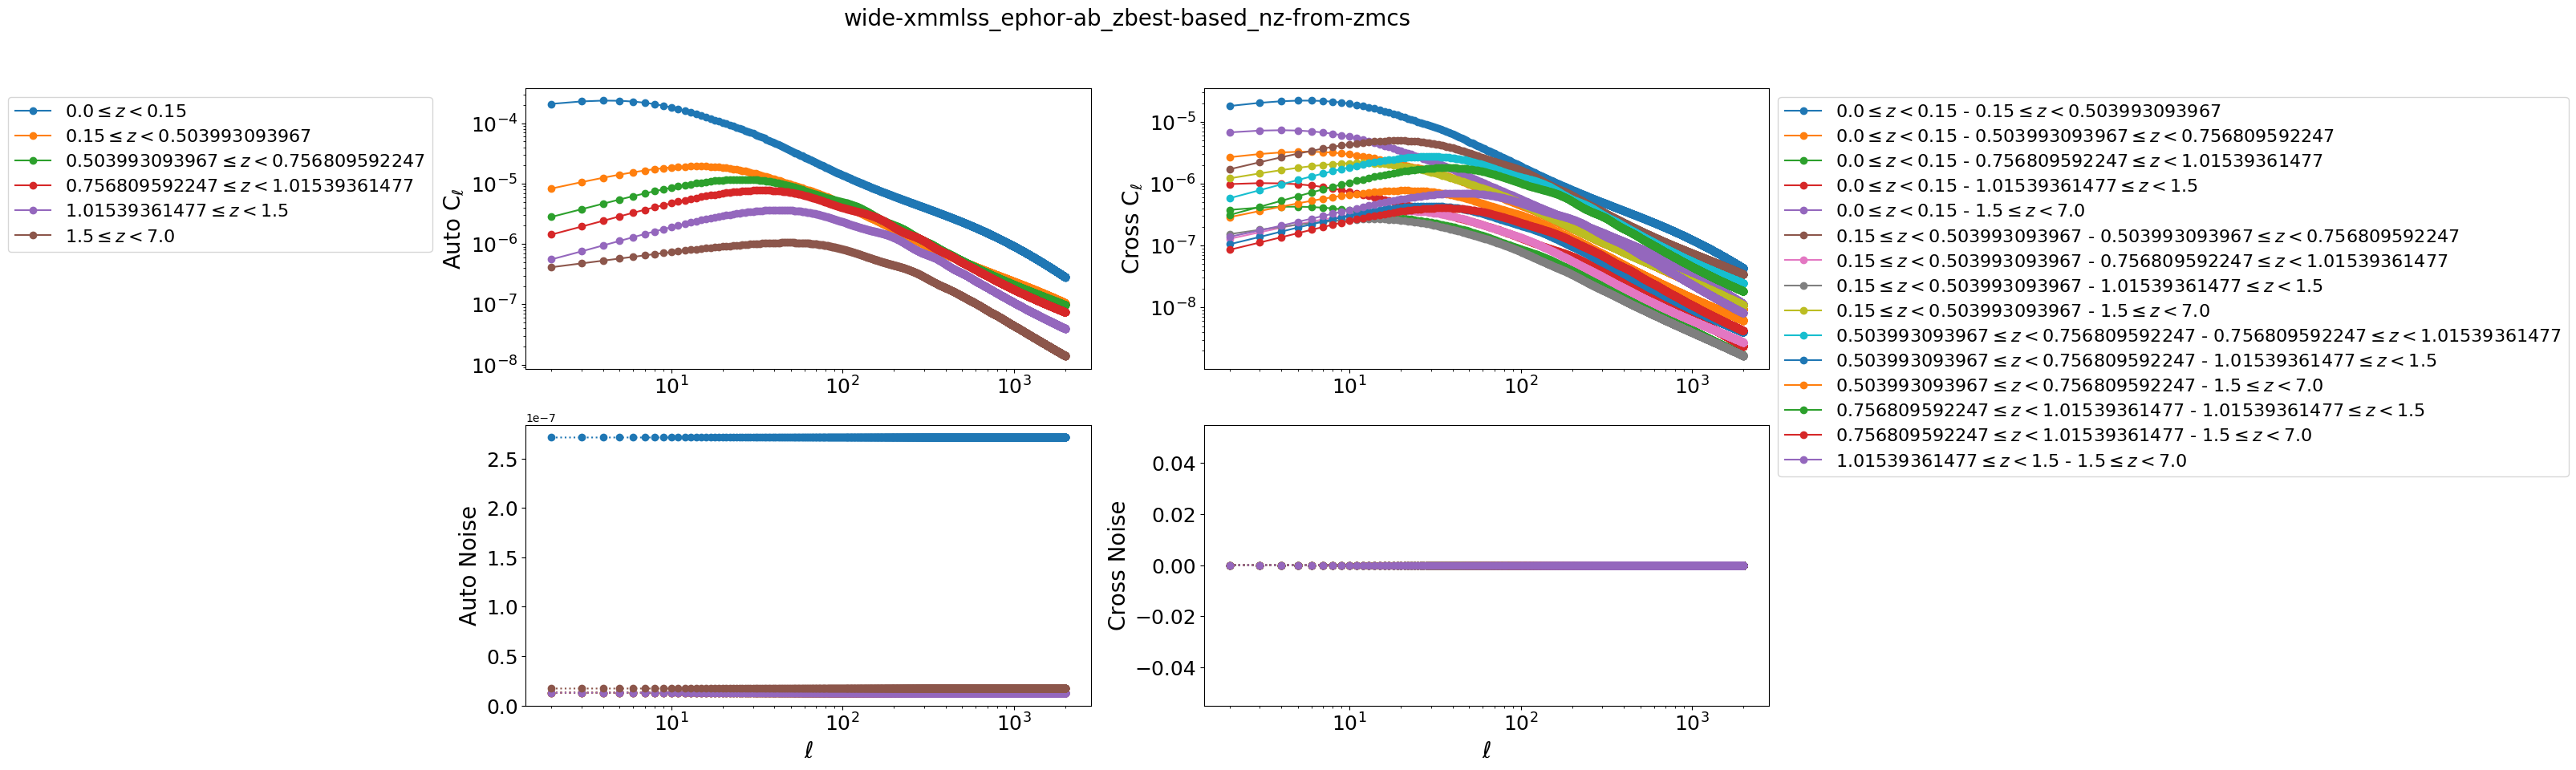

wide-vvds_frankenz_zbest-based_nz-from-zmcs_4bins_spectra.png


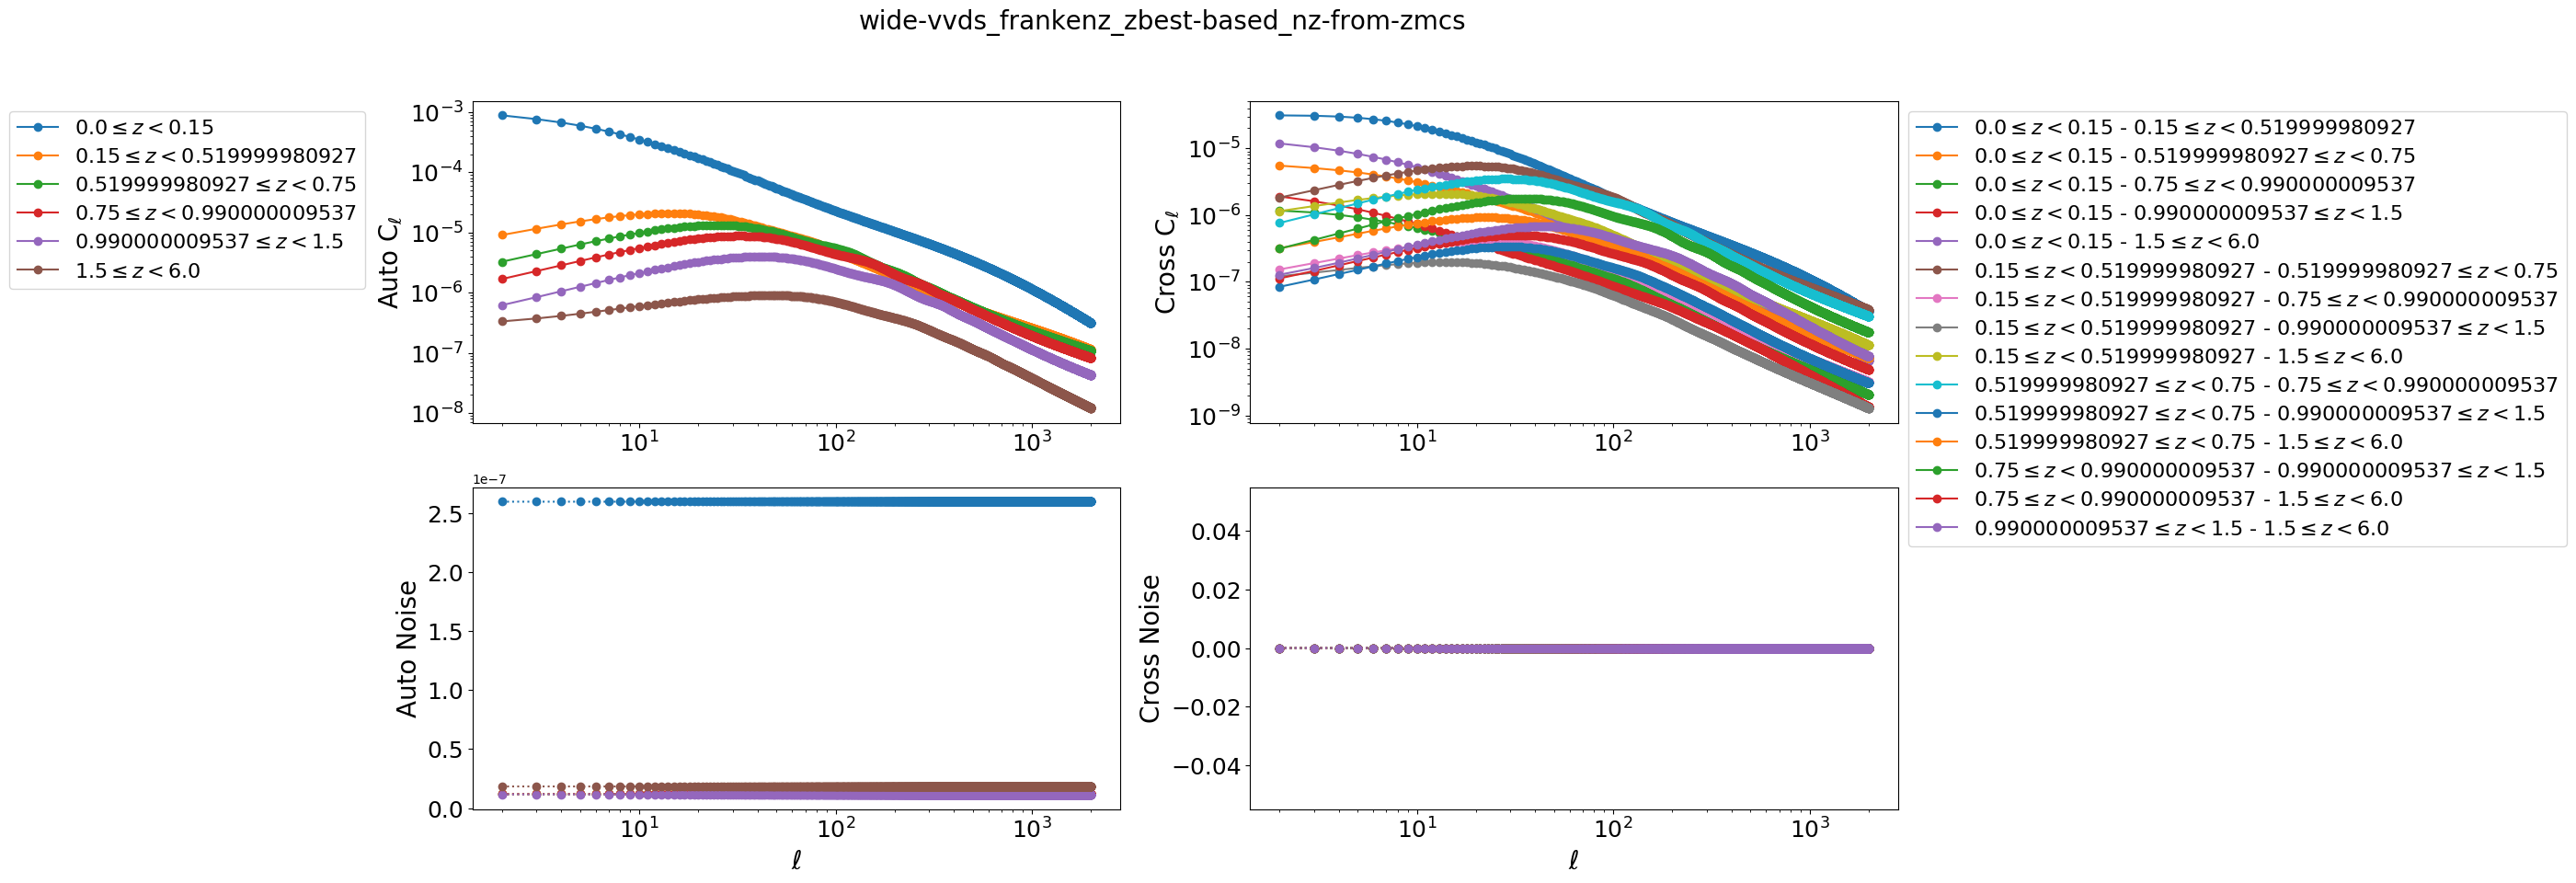

wide-xmmlss_frankenz_zbest-based_nz-from-zmcs_4bins_spectra.png


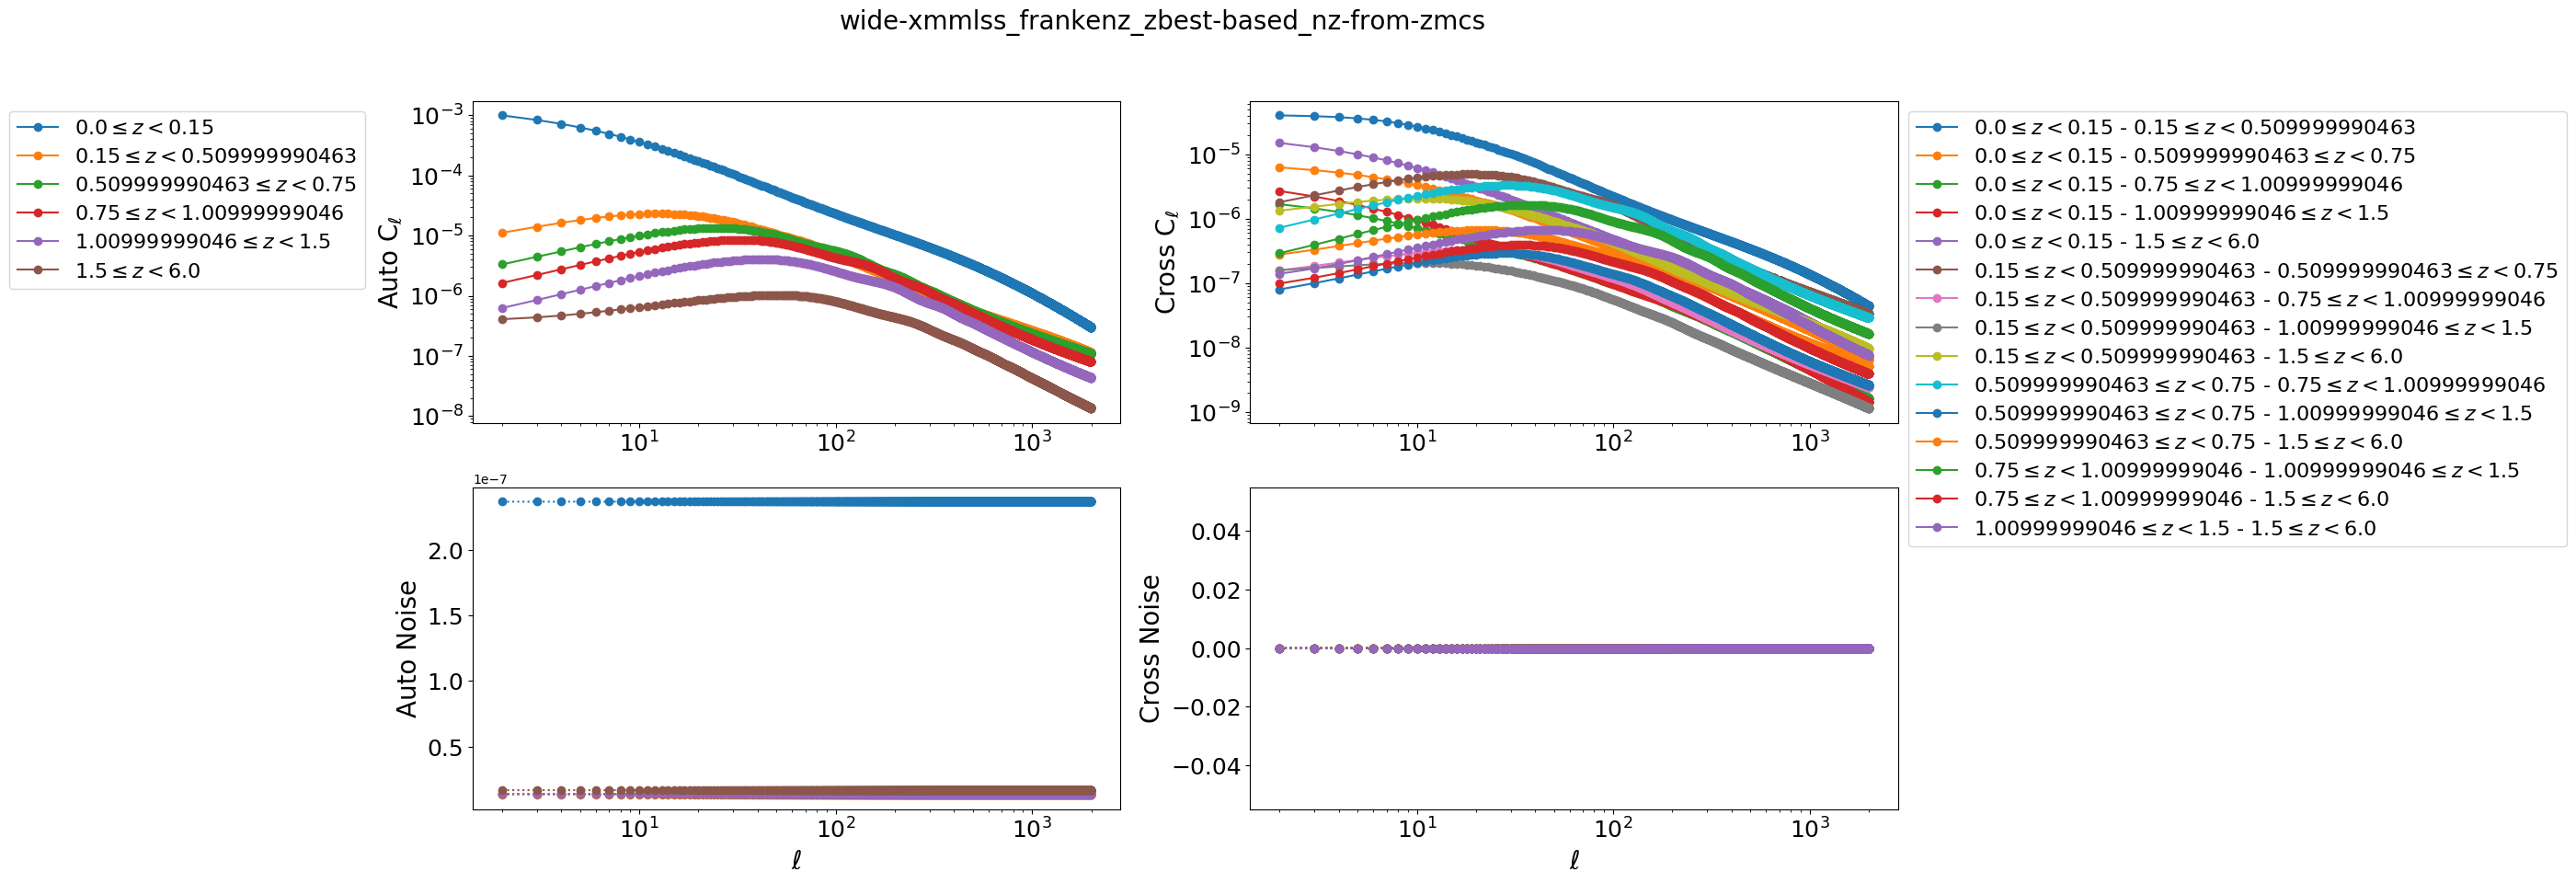

In [16]:
for png in [f for f in allpngs if f.__contains__('4bins') and f.__contains__('zbest') \
            and f.__contains__('spec') and not f.__contains__('aegis')]:
    print(png)
    display(Image(filename='%s/%s'%(outDir, png), width=1200) )

The spectra (top left) look reasonable - good.